In [21]:
from ucimlrepo import fetch_ucirepo 
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from implementations import utils
import seaborn as sns

In [22]:
wine_quality = fetch_ucirepo(id=186) 
  
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

y = reassign_classes(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [66]:
importlib.reload(id3)
importlib.reload(utils)
tree = id3.DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)

In [67]:
tree.evaluate(x_test, y_test)

Accuracy after predicting 650 samples: 75.69%


0.7569230769230769

In [68]:
y_pred = tree.predict(x_test)

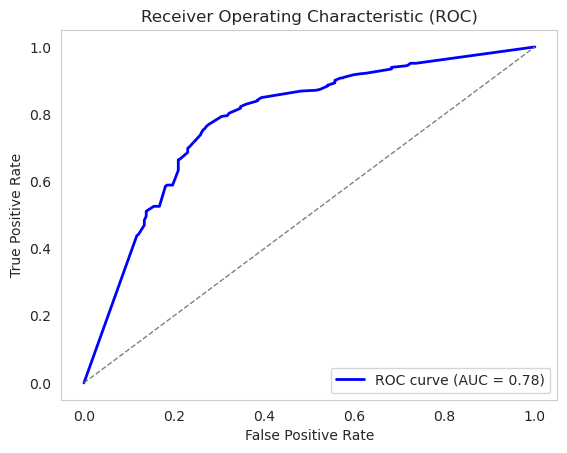

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example data

y_scores = y_pred[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [30]:
y_pred

array([[0.        , 1.        ],
       [0.34306569, 0.65693431],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.88888889, 0.11111111]])

In [31]:
importlib.reload(utils)
quality_measures = utils.MeasuresOfQuality(y_pred, y_test)

In [32]:
quality_measures.compile()

In [33]:
quality_measures.accuracy(1)

0.7569230769230769

In [34]:
cm = quality_measures.get_confusion_matrix(selected_class=1)

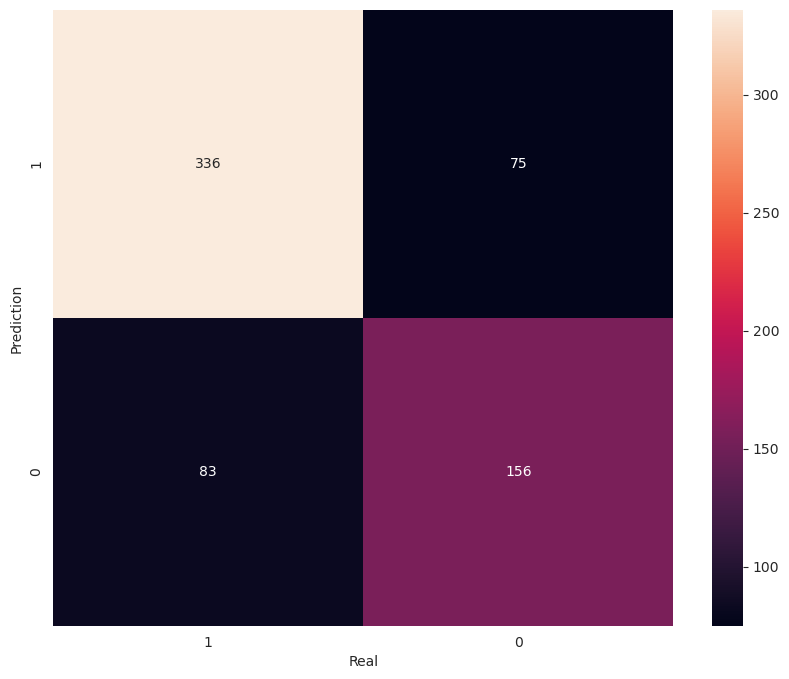

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            xticklabels=[1, 0],
            yticklabels=[1, 0],
            annot=True, fmt='g')
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.show()

In [36]:
# importlib.reload(random_forest)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
# accuracies = []
# time1 = time.time()
# 
# for _ in range(1):
#     y_pred = []
#     rfc = random_forest.RandomForestClassifier(classifiers_number=1000)
#     rfc.train_random_forest(x_train, y_train, tree_percentage=1.0)
#     
#     samples = len(y_test)
#     correctly_predicted = 0
#     for sample, gt in zip(x_test, y_test):
#         prediction = rfc.predict(sample)
#         y_pred.append(prediction)
#         print(int(prediction), gt)
#         if prediction == gt:
#             correctly_predicted += 1
#     
#     print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
#     print(f"Elapsed time: {time.time()-time1:.2f} s")
#     accuracies.append((correctly_predicted / samples) * 100)
# print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

In [41]:
importlib.reload(random_forest)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
accuracies = []
time1 = time.time()

for _ in range(1):
    y_pred = []
    rfc = random_forest.RandomForestClassifier(classifiers_number=10)
    rfc.fit(x_train, y_train, tree_percentage=1.0)
    
    samples = len(y_test)
    correctly_predicted = 0
    for sample, gt in zip(x_test, y_test):
        prediction = np.argmax(rfc.predict(sample))
        y_pred.append(prediction)
        print(int(prediction), gt)
        if prediction == gt:
            correctly_predicted += 1
    
    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

1.0
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 0
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 1
0 0
0 1
1 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
0 1
0 0
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
0 0
1 0
0 0
1 0
1 1
1 0
1 1
0 0
1 1
0 1
0 0
1 1
0 0
0 0
1 1
0 1
1 1
1 1
1 1
1 0
0 1
0 0
1 0
0 1
1 1
0 1
1 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
1 1
0 0
1 1
1 0
0 1
1 1
1 1
0 0
1 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 0


In [61]:
type(x_test)

numpy.ndarray

In [74]:
importlib.reload(bayes)

nb = bayes.NaiveBayes(discretization_type="percentile")
nb.fit(x_train, y_train, discrete_x=False)
y_pred_bayes = nb.predict(x_test)

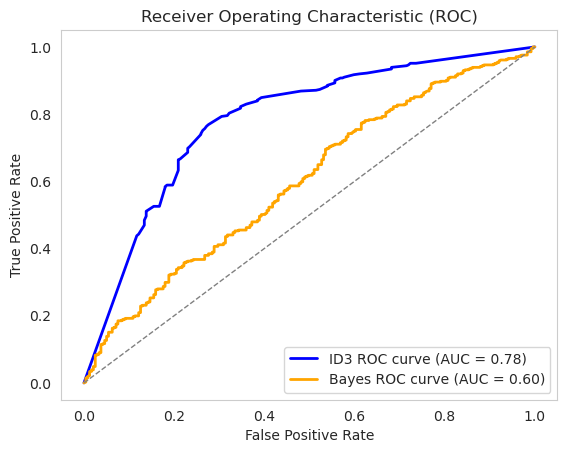

In [72]:
y_scores_bayes = y_pred_bayes[:, 1]

# Compute ROC curve
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_scores_bayes)

# Compute AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ID3 ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

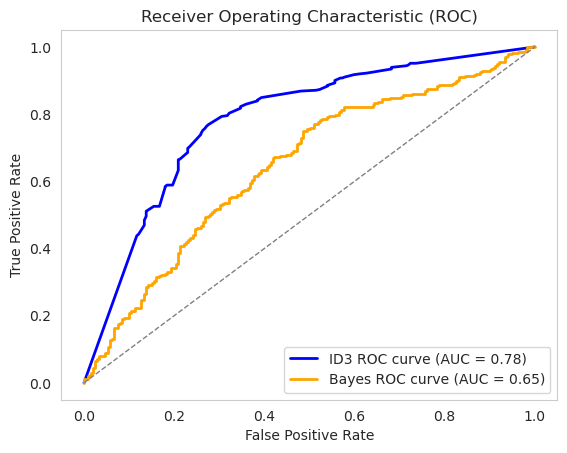

In [75]:
y_scores_bayes = y_pred_bayes[:, 1]

# Compute ROC curve
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_scores_bayes)

# Compute AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ID3 ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [76]:
rfc = random_forest.RandomForestClassifier(classifiers_number=100)
rfc.fit(x_train, y_train, tree_percentage=1.0)
y_pred_rf = rfc.predict(x_test)

1.0


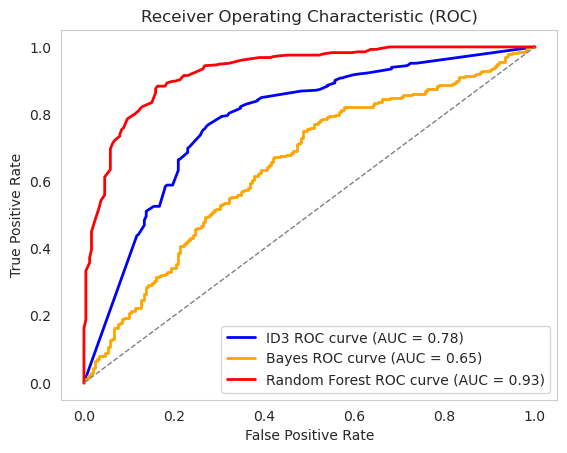

In [78]:
y_scores_rf = y_pred_rf[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_scores_rf)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ID3 ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [79]:
rfc2 = random_forest.RandomForestClassifier(classifiers_number=100)
rfc2.fit(x_train, y_train, tree_percentage=0.5)
y_pred_rf_2 = rfc2.predict(x_test)

0.5


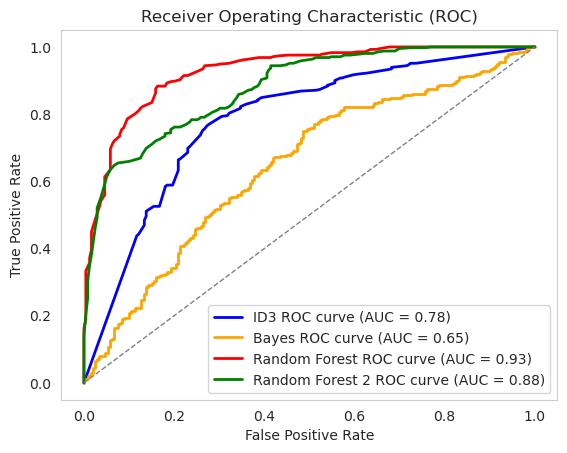

In [80]:
y_scores_rf2 = y_pred_rf_2[:, 1]

# Compute ROC curve
fpr_rf2, tpr_rf2, thresholds = roc_curve(y_test, y_scores_rf2)

# Compute AUC
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ID3 ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_rf2, tpr_rf2, color='green', lw=2, label=f'Random Forest 2 ROC curve (AUC = {roc_auc_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Random Forests with different settings

In [83]:
importlib.reload(random_forest)
rfc = random_forest.RandomForestClassifier(classifiers_number=100, discretization_type="percentile", discrete_x=False)
rfc.fit(x_train, y_train, tree_percentage=0.5)
y_pred_rf = rfc.predict(x_test)

In [84]:
importlib.reload(random_forest)
rfc2 = random_forest.RandomForestClassifier(classifiers_number=100, discretization_type="uniform", discrete_x=False)
rfc2.fit(x_train, y_train, tree_percentage=0.5)
y_pred_rf_2 = rfc2.predict(x_test)

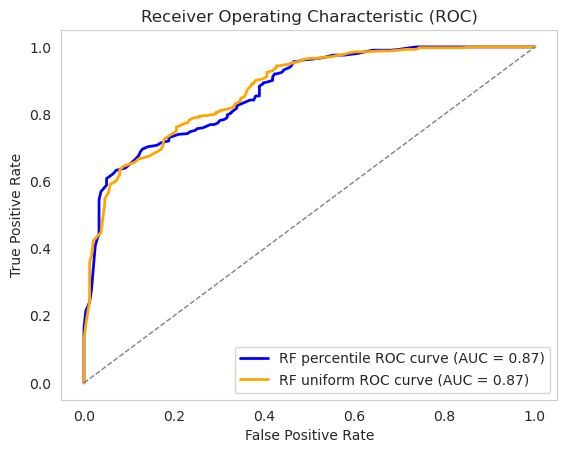

In [85]:
y_scores = y_pred_rf[:, 1]
y_scores2 = y_pred_rf_2[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_scores)
fpr_rf2, tpr_rf2, thresholds = roc_curve(y_test, y_scores2)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RF percentile ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_rf2, tpr_rf2, color='orange', lw=2, label=f'RF uniform ROC curve (AUC = {roc_auc_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [87]:
fpr_list = []
tpr_list = []
auc_list = []

for attempt in range(25):
    # Train the model and predict probabilities
    rfc = random_forest.RandomForestClassifier(classifiers_number=100, discretization_type="percentile", discrete_x=False)
    rfc.fit(x_train, y_train, tree_percentage=0.5)
    y_pred_rf = rfc.predict(x_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
    roc_auc = auc(fpr, tpr)

    # Store results
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)

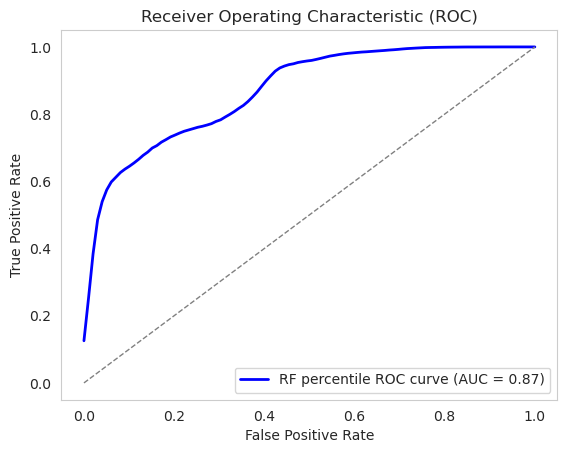

In [88]:
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'RF percentile ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()